# Predictive Modeling for Building Energy Efficiency


## Table of Contents

1.[Problem Statement and Objectives](#Problem-Statement-and-Objectives)

2.[Data Description](#Data-Description)

3.[Importation of Packages](#Importation-of-Packages)

4.[Data Importation](#Data-Importation)

5.[Data Cleaning and Validation](#Data-Cleaning-and-Validation)

6.[Exploratory Data Analysis](#Exploratory-Data-Analysis)

7.[Model Building and Hyperparameter Tuning](#Model-Building-and-Hyperparameter-Tuning)

8 [Model Comparison](#Model-Comparison)

9.[Model Selection](#Model-Selection)

10.[Conclusion](#Conclusion)



## Introduction

Overall, buildings use 40% of the world's energy, making them a critical target for energy efficiency improvements. Addressing heating and cooling needs throughout a building's lifecycle, including operation and design stages, can lead to energy savings, lower operational costs, and reduced environmental impact.


## Problem Statement and Objectives

With a growing emphasis on sustainable and energy-efficient building designs, it is vital to understand and estimate heating and cooling energy requirements.

This work intends to forecast these loads using multiple machine learning models and building energy performance data, which can help to optimize energy usage, reduce expenses, and minimize environmental effect.

The purpose of this project is to create a predictive model that can accurately forecast the heating and cooling load requirements for building energy efficiency.













## Data Description


The dataset includes the following features about building design and energy use. The features explain how building design influences the amount of energy required for heating and cooling.:

- **Relative Compactness**: Determines how compact the building shape is.


- **Surface Area (m²)**: The whole outside area of the building.


- **Wall Area (m²)** refers to the total area of the building's walls.


- **Roof Area (m²)**: The size of the building's roof.


- **Overall Height (m)**: The height of the building.


- **Orientation**: The direction the building faces (2: north, 3: east, 4: south, 5: west).


- **Glazing Area (% of floor area)**: The proportion of the floor area covered by windows (0%, 10%, 25%, 40%).


- **Glazing Area Distribution**: How windows are distributed (1: uniform, 2: north, 3: east, 4: south, and 5: west).


- **Heating Load (kWh)**: The energy required to heat the building.


- **Cooling Load (kWh)**: The energy required to cool the building.





## Importation of Packages

In [1]:
#importing packages for data manipulation and visualization
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

#importing algorithms
!pip install xgboost
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#importing packages for model selection and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE


## Data Importation

In [111]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5070-5205

 Directory of C:\Users\HP\Desktop\AI_Data Science\Python Projects

07/01/2024  07:57 AM    <DIR>          .
07/01/2024  07:57 AM    <DIR>          ..
07/01/2024  05:59 AM    <DIR>          .ipynb_checkpoints
05/12/2024  03:52 PM            34,375 Building Energy Efficiency.csv
03/29/2024  11:09 PM           579,797 Exercise melanoma data analysis.ipynb
06/25/2024  12:13 PM           513,255 FoodHub Sales and Delivery Data Analysis.ipynb
03/21/2024  02:01 PM           123,933 foodhub_order.csv
03/28/2024  12:24 PM           697,961 Group 5 - FoodHub Sales and Delivery Analysis.ipynb Final.ipynb
05/21/2024  09:58 AM           697,961 Group 5 - FoodHub Sales and Delivery Analysis.ipynb Final-Copy1.ipynb
04/02/2024  10:57 AM           845,288 Group 5- Mid-Course Project (Data Analysis Project.ipynb
07/01/2024  05:02 AM           645,603 Naadu-Mid-Course Project (Data Analysis Project) (1).ipynb
07/01/2024  07:57 AM       

In [108]:
# Loading dataset
energy_df = pd.read_csv('Building Energy Efficiency.csv')

[Back to Table of Contents](#Table-of-Contents)

### Data Cleaning & Validation

In [4]:
energy_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Observation**: All variables are numeric and most of the data types are floats

In [6]:
energy_df.shape

(768, 10)

**Observation**: The dataset contains 768 rows and 10 columns

In [7]:
energy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.763885,0.105490,0.62,0.6825,0.75,0.8200,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [8]:
energy_df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [9]:
energy_df.duplicated().sum()

0

 **Observation**: There are no missing values or duplicated rows in the data set

In [11]:
energy_df.nunique()

Relative Compactness          13
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

**Observation**: Most of the observations are similar.

In [104]:
energy_df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

[Back to Table of Contents](#Table-of-Contents)

## Exploratory Data Analysis

### Univariate Analysis

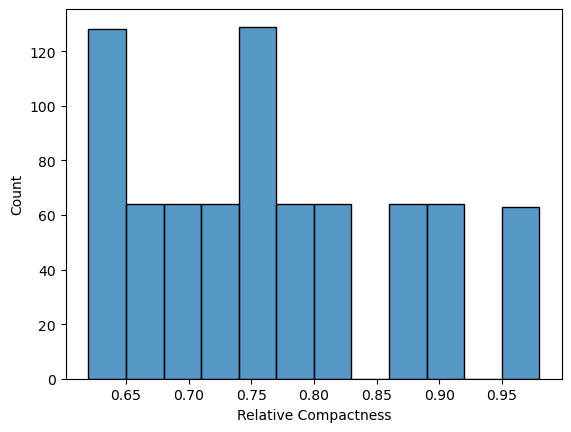

In [12]:
sns.histplot(x='Relative Compactness', data=energy_df)
plt.show()

**Observation**: Most of the observation for Relative Compactness were about 0.65  and 0.75.

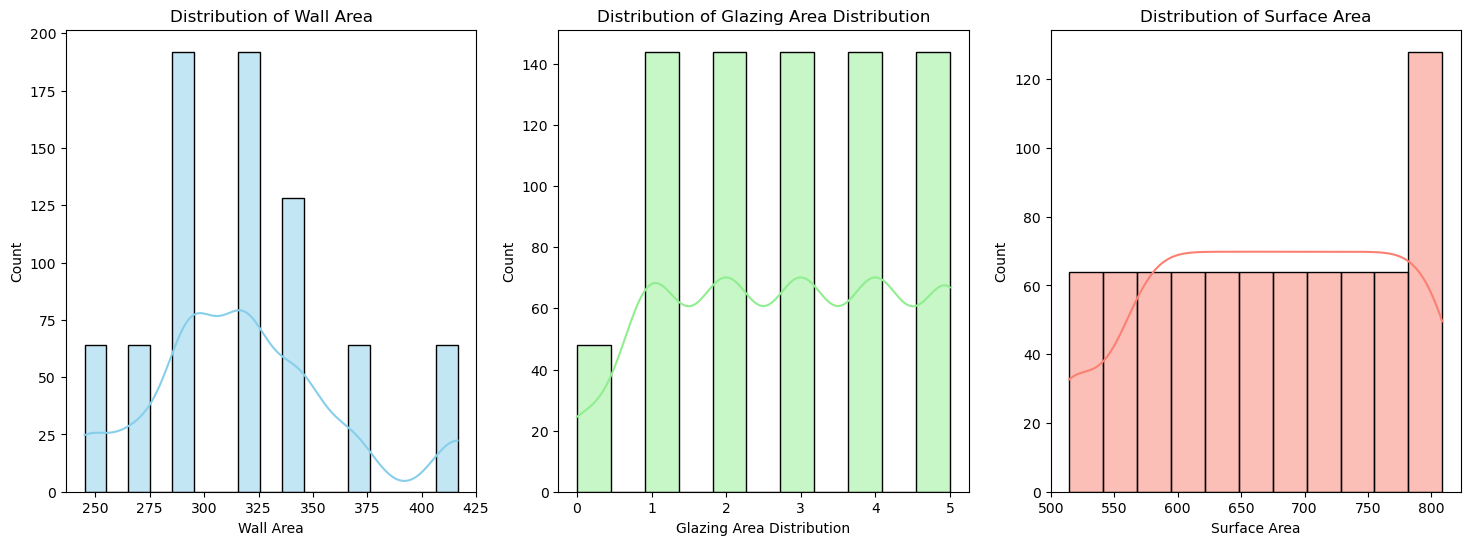

In [120]:
fig, axes= plt.subplots(1,3, figsize=(18,6))

sns.histplot(energy_df['Wall Area'],ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Wall Area')

sns.histplot(energy_df['Glazing Area Distribution'],ax=axes[1], color='lightgreen', kde=True)
axes[1].set_title('Distribution of Glazing Area Distribution')

sns.histplot(energy_df['Surface Area'],ax=axes[2], color='salmon', kde=True)
axes[2].set_title('Distribution of Surface Area')

plt.show()




**Observation**: The Wall Area demonstrates a normal distribution whereas the Surface area demonstrates a left skewed distribution

[Back to Table of Contents](#Table-of-Contents)

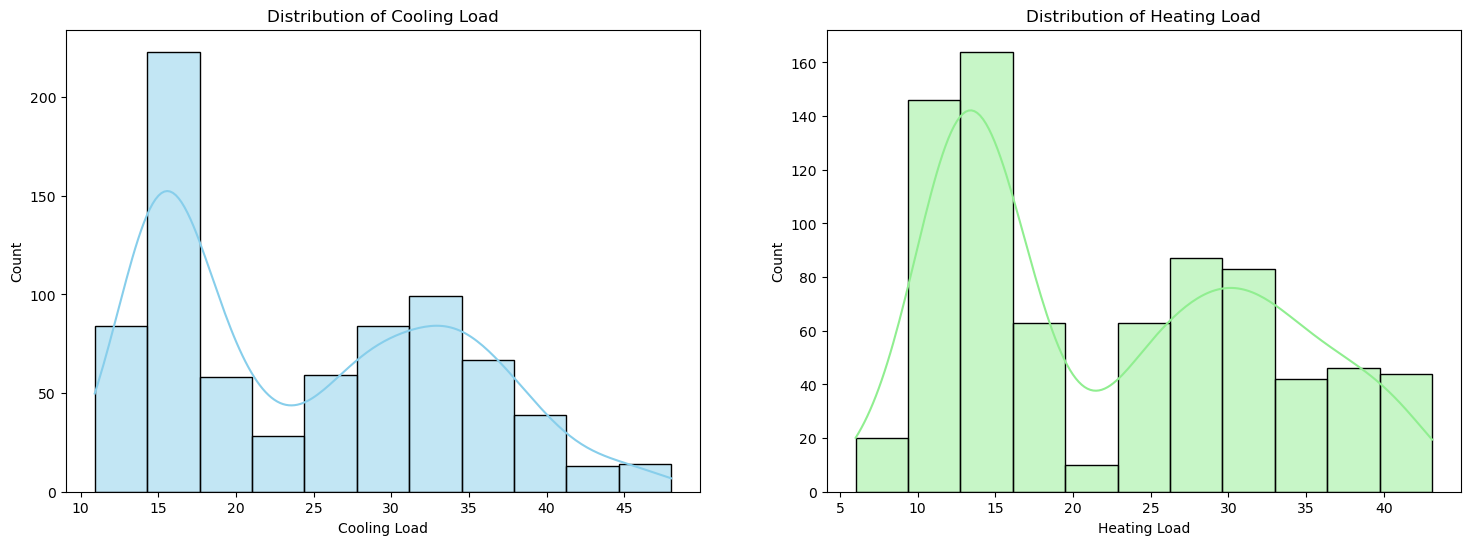

In [121]:
#Checking distributions of target variables
fig, axes= plt.subplots(1,2, figsize=(18,6))
sns.histplot(energy_df['Cooling Load'],ax=axes[0], color='skyblue',kde=True)
axes[0].set_title('Distribution of Cooling Load')

sns.histplot(energy_df['Heating Load'],ax=axes[1], color='lightgreen', kde=True)
axes[1].set_title('Distribution of Heating Load')

plt.show()

**Observation**: Both graphs show a bimodal distribution

### Bivariate Analysis

In [17]:
energy_df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

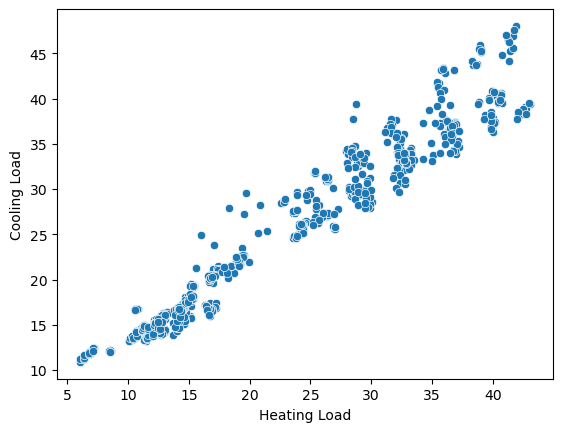

In [20]:
sns.scatterplot(x= 'Heating Load', y='Cooling Load', data = energy_df)
plt.show()

**Observation**: A correlation is demonstrated between cooling load and heating load

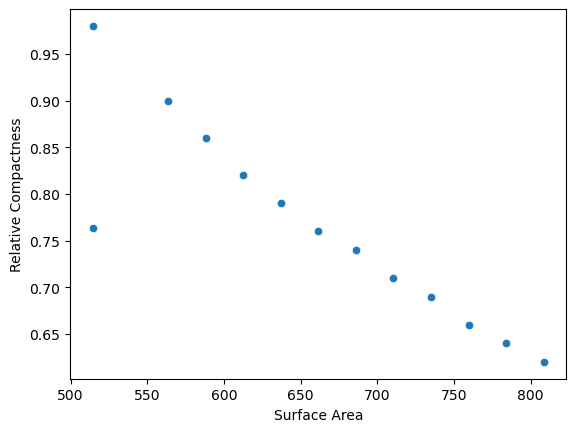

In [21]:
sns.scatterplot(x='Surface Area', y='Relative Compactness', data= energy_df)

plt.show()

**Observation**: The graph shows a negative correlation between Relative Compactness and Surface Area

### Multivariate Analysis

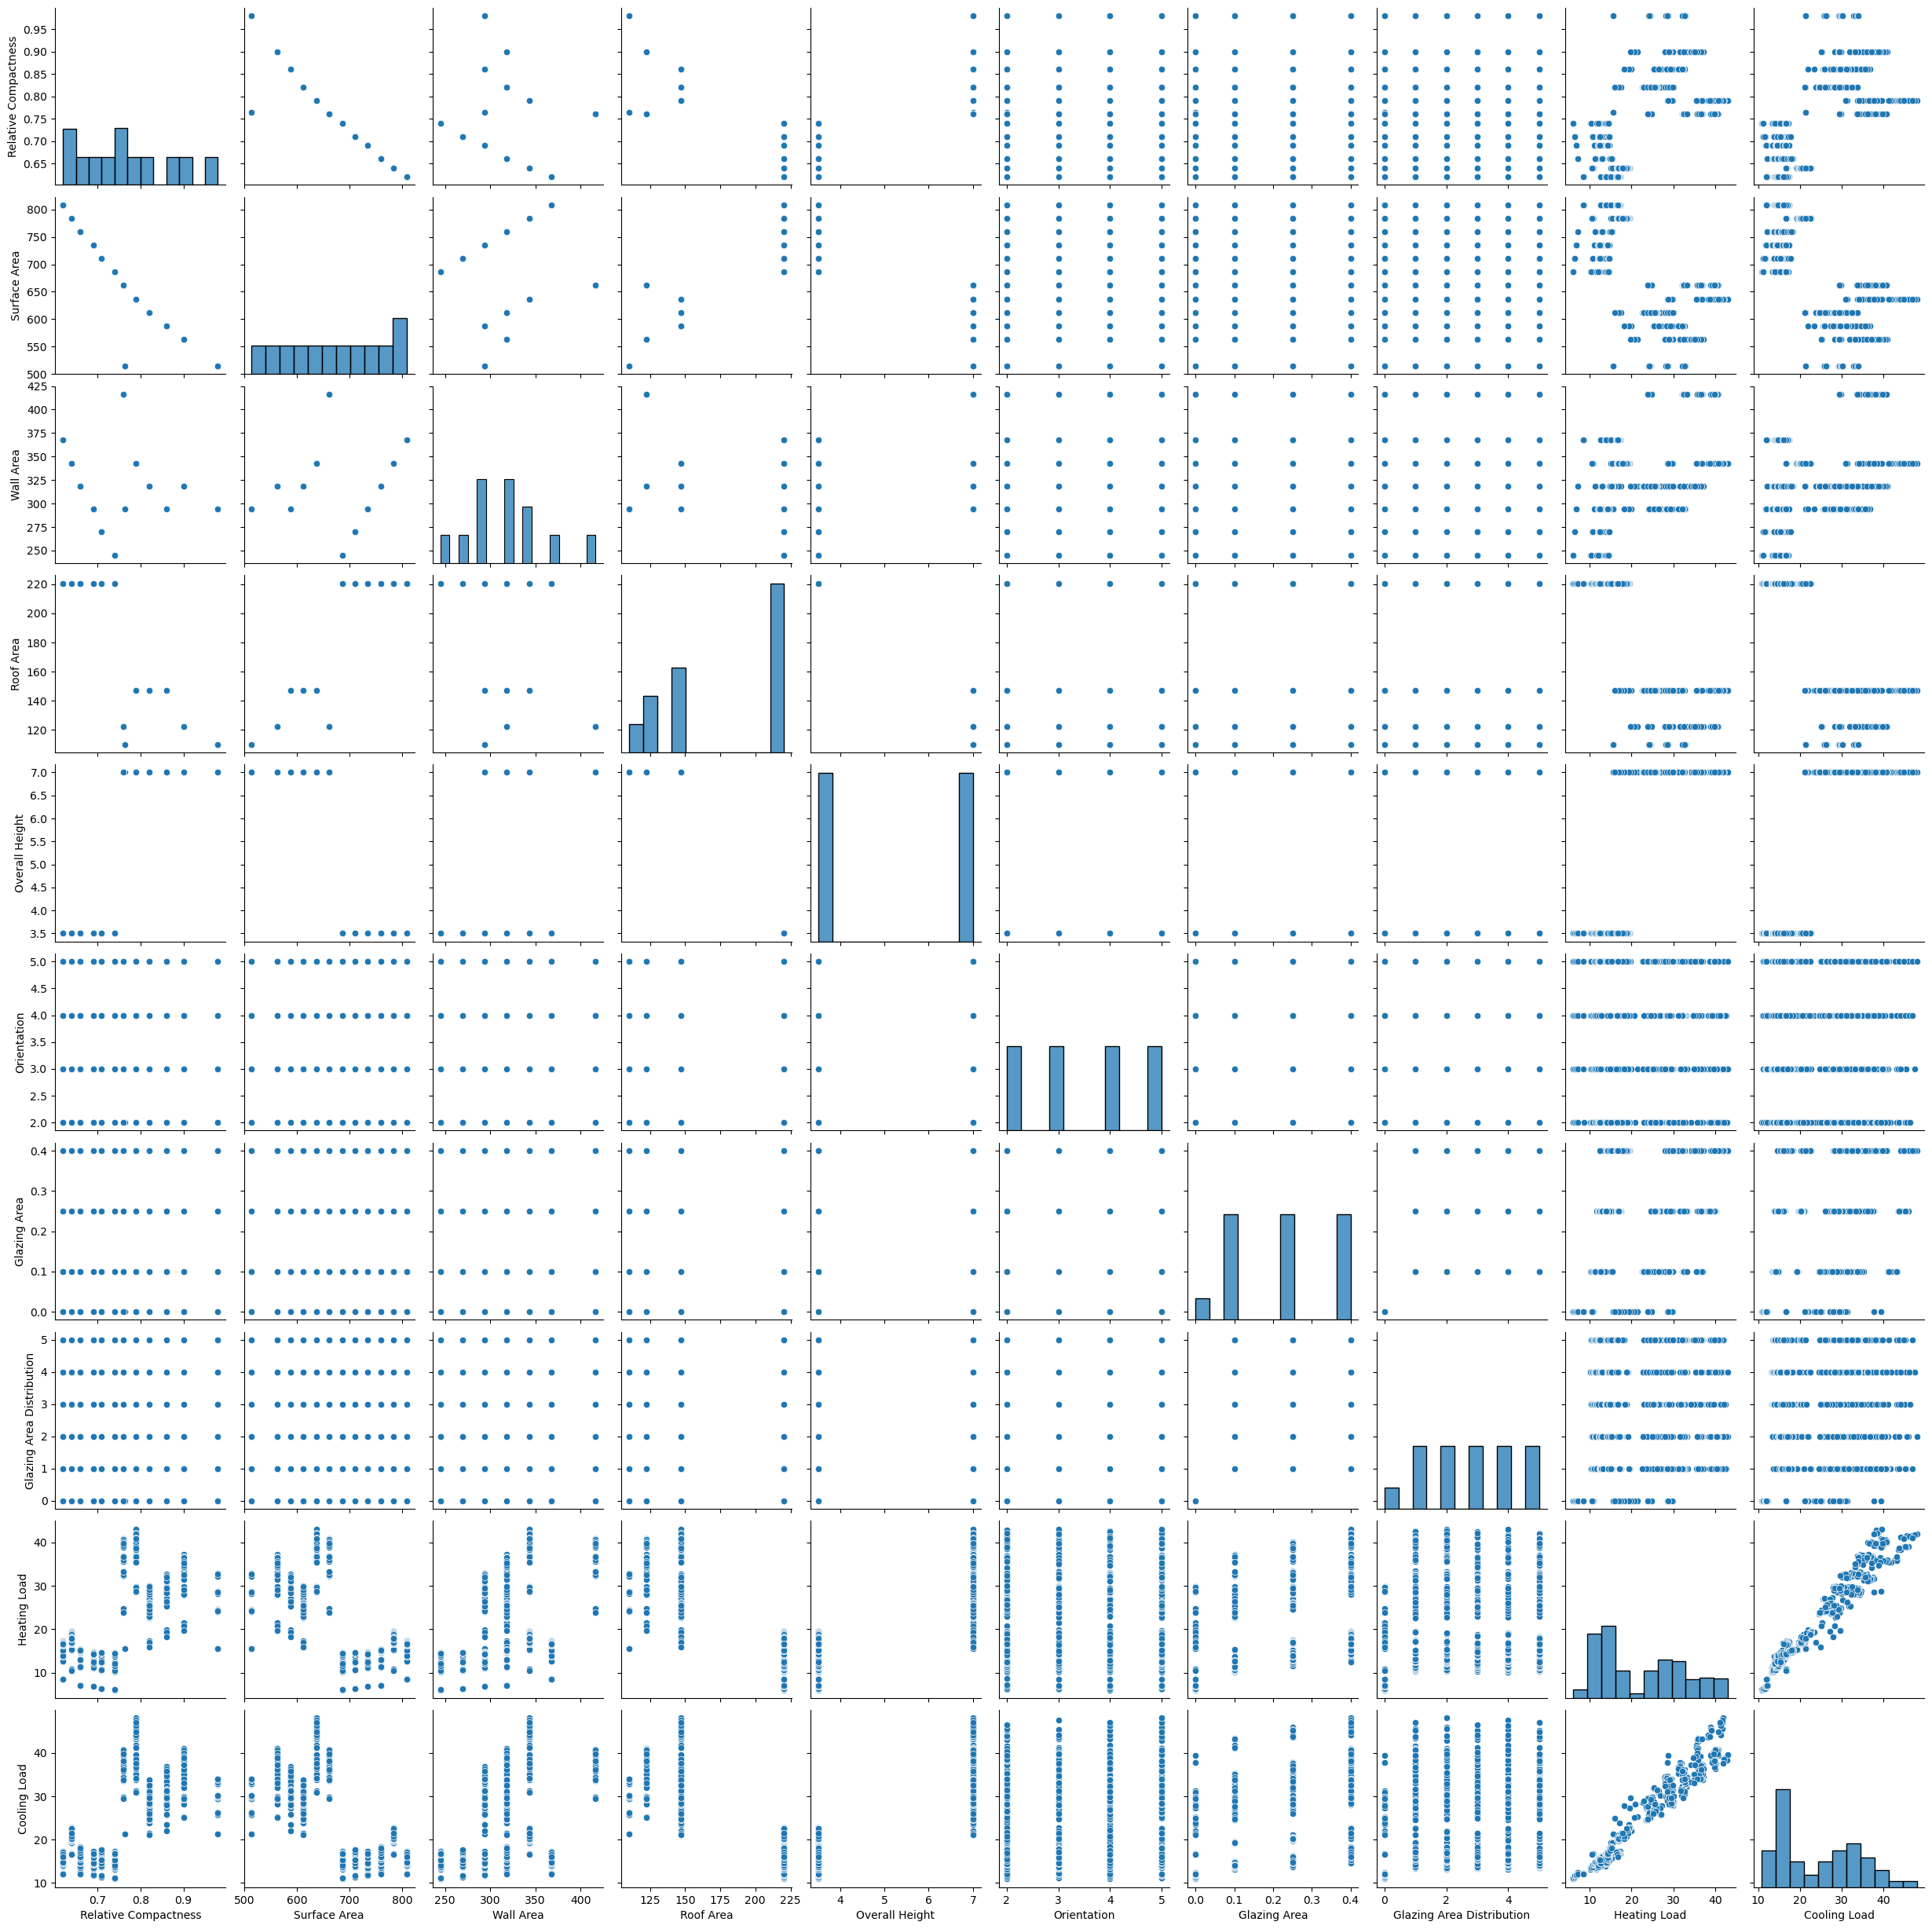

In [22]:
sns.pairplot(data = energy_df)
plt.show()

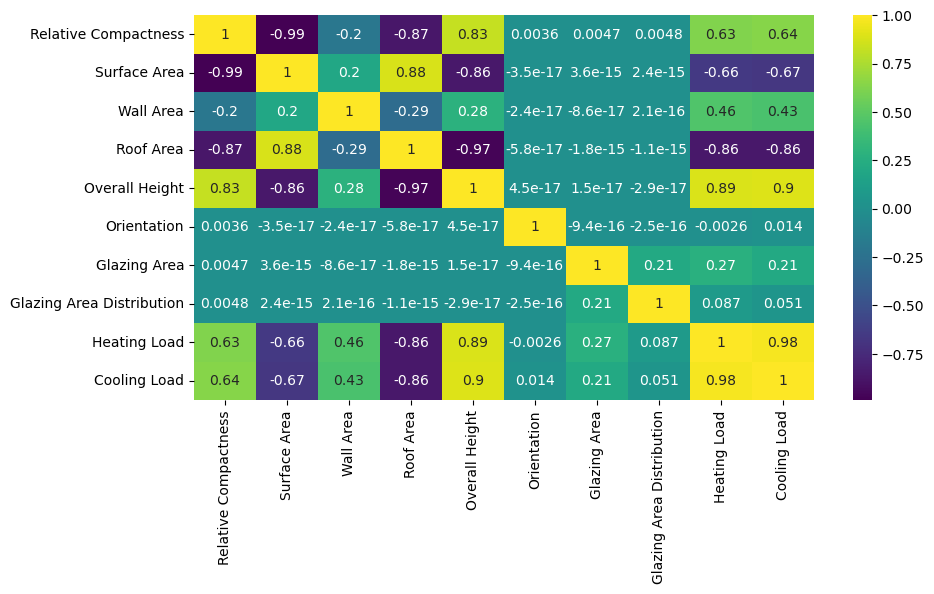

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(energy_df.corr(), annot= True,cmap='viridis')
plt.show()

**Observation**: Both heating and cooling loads were highly correlated with Roof Area and Overall Height. There was also a moderate correlation between the heating and cooling loads and Relative compactment and Surface area.

### Data Pre-Processing

In [24]:
#Splitting data into feature and target variables
#y1 for Heating Load and y2 for cooling load
X= energy_df.drop(columns=['Cooling Load','Heating Load'])
y1= energy_df['Heating Load']
y2=energy_df['Cooling Load']
y= energy_df[['Cooling Load', 'Heating Load']]


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.25, random_state = 42)
X_train.head(),  X_test.head(), y1_train.head(), y1_test.head(),y2_train.head(), y2_test.head()

(     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 357                  0.76         661.5      416.5     122.50             7.0   
 73                   0.74         686.0      245.0     220.50             3.5   
 352                  0.79         637.0      343.0     147.00             7.0   
 497                  0.79         637.0      343.0     147.00             7.0   
 145                  0.98         514.5      294.0     110.25             7.0   
 
      Orientation  Glazing Area  Glazing Area Distribution  
 357            3          0.25                          2  
 73             3          0.10                          1  
 352            2          0.25                          2  
 497            3          0.25                          5  
 145            3          0.10                          3  ,
      Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 668                  0.62         808.5      367.5     2

### Model Building and Hyperparameter Tuning

### SVR

#### SVR before hyperparameter tuning

In [28]:
#For cooling load
svr1 = SVR()
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))

#for heating load
svr2 = SVR()
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y1: 0.69 
Test set score for y1: 0.69 
Train set score for y2: 0.70 
Test set score for y2: 0.68 


#### Hyperparameter Tuning for SVR, y1 and y2

In [29]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr1_grid = GridSearchCV(SVR(), param_grid, cv=5)

svr1_grid .fit(X_train, y1_train)
print("Test set score for y1: {:.2f} ".format(svr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {} ".format(svr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f} ".format(svr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(svr1_grid.best_estimator_))



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr2_grid  = GridSearchCV(SVR(), param_grid, cv=5)

svr2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(svr2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(svr2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(svr2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(svr2_grid.best_estimator_))

Test set score for y1: 0.99 
Best parameters for y1: {'C': 100, 'gamma': 0.1} 
Best cross-validation score for y1: 0.99 
Best estimator for y1:
SVR(C=100, gamma=0.1) 
Test set score for target 2: 0.98
Best parameters for target 2: {'C': 100, 'gamma': 0.1}
Best cross-validation score for target 2: 0.98
Best estimator for target 2:
SVR(C=100, gamma=0.1) 


#### SVR after hyperparameter tuning

In [30]:
svr1 = SVR(C=100,gamma=0.1)
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))


svr2 = SVR(C=100, gamma=0.1)
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y1: 1.00 
Test set score for y1: 0.99 
Train set score for y2: 0.99 
Test set score for y2: 0.98 


### Lasso Regression

#### Lasso Regression before Hyperparameter tuning

In [31]:
lasso1 = Lasso()
lasso1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for y1: 0.79
Test set score for y1: 0.79


In [32]:
lasso2 = Lasso()
lasso2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for y2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for y2: 0.78
Test set score for y2: 0.77


#### Hyperparameter tuning for Lasso regression

In [33]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_grid1 = GridSearchCV(lasso1, param_grid, cv=5)

lasso_grid1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(lasso_grid1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(lasso_grid1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(lasso_grid1.best_score_))
print("Best estimator for y1:\n{} ".format(lasso_grid1.best_estimator_))

Test set score for y1: 0.90
Best parameters for y1: {'alpha': 0.1}
Best cross-validation score for y1: 0.90
Best estimator for y1:
Lasso(alpha=0.1) 


In [34]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
lasso_grid2 = GridSearchCV(lasso2, param_grid, cv=5)

lasso_grid2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(lasso_grid2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(lasso_grid2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(lasso_grid2.best_score_))
print("Best estimator for y2:\n{} ".format(lasso_grid2.best_estimator_))

Test set score for y2: 0.88
Best parameters for y2: {'alpha': 0.1}
Best cross-validation score for y2: 0.87
Best estimator for y2:
Lasso(alpha=0.1) 


#### Lasso regression after hyperparameter tuning

In [35]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X_train, y1_train)
print("Train set score for target 1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for target 1: 0.91
Test set score for target 1: 0.90


In [36]:
lasso2 = Lasso(alpha=0.1)
lasso2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for target 2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for target 2: 0.87
Test set score for target 2: 0.88


### Ridge Regression

#### Ridge Regression before hyperparameter tuning


In [37]:
ridge1 = Ridge()
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.91
Test set score for y1: 0.91


In [38]:
ridge2 = Ridge()
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.88
Test set score for y2: 0.89


#### Hyperparameter tuning for ridge regression

In [39]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge1_grid = GridSearchCV(ridge1, param_grid, cv=5)

ridge1_grid.fit(X_train, y1_train)
print("Test set score for target 1: {:.2f}".format(ridge1_grid.score(X_test, y1_test)))
print("Best parameters for target 1: {}".format(ridge1_grid.best_params_))
print("Best cross-validation score for target 1: {:.2f}".format(ridge1_grid.best_score_))
print("Best estimator for target 1:\n{} ".format(ridge1_grid.best_estimator_))

Test set score for target 1: 0.91
Best parameters for target 1: {'alpha': 0.1}
Best cross-validation score for target 1: 0.91
Best estimator for target 1:
Ridge(alpha=0.1) 


In [40]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
ridge2_grid = GridSearchCV(ridge2, param_grid, cv=5)

ridge2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(ridge2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(ridge2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(ridge2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(ridge2_grid.best_estimator_))

Test set score for target 2: 0.89
Best parameters for target 2: {'alpha': 0.1}
Best cross-validation score for target 2: 0.88
Best estimator for target 2:
Ridge(alpha=0.1) 


#### Ridge regression after hyperparameter tuning

In [41]:
ridge1 = Ridge(alpha=0.1)
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.91
Test set score for y1: 0.91


In [42]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.88
Test set score for y2: 0.89


### Kneighbors Regressor

#### KNeigbors Regressor  before hyperparameter tuning

In [43]:
knr1 = KNeighborsRegressor()
new_var = knr1.fit(X_train, y1_train)
print('Train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('Test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor()
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

Train set score for y1 is 0.97
Test set score for y1 is 0.95

The train set score for y2 is 0.98
The test set score for y2 is 0.95


#### Hyperparameter tuning for KNeighborsRegressor

In [44]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr1_grid = GridSearchCV(knr1, param_grid, cv=5)

knr1_grid.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(knr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(knr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(knr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(knr1_grid.best_estimator_))

Test set score for y1: 0.95
Best parameters for y1: {'n_neighbors': 3}
Best cross-validation score for y1: 0.94
Best estimator for y1:
KNeighborsRegressor(n_neighbors=3) 


In [45]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr2_grid = GridSearchCV(knr2, param_grid, cv=5)

knr2_grid.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(knr2_grid.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(knr2_grid.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(knr2_grid.best_score_))
print("Best estimator for y2:\n{} ".format(knr2_grid.best_estimator_))

Test set score for y2: 0.95
Best parameters for y2: {'n_neighbors': 3}
Best cross-validation score for y2: 0.95
Best estimator for y2:
KNeighborsRegressor(n_neighbors=3) 


#### KNeighbors Regressor after hyperparameter tuning

In [46]:
knr1 = KNeighborsRegressor(n_neighbors=3)
new_var = knr1.fit(X_train, y1_train)
print('The train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('The test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor(n_neighbors=3)
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

The train set score for y1 is 0.97
The test set score for y1 is 0.95

The train set score for y2 is 0.97
The test set score for y2 is 0.95


### XGBoost Regressor

#### XGB Regressor before hyperparameter tuning

In [47]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y1_train, y2_train)

train_accuracy =xgb_regressor.score(X_train, y1_train)
train_accuracy_1 =xgb_regressor.score(X_train,y2_train)
train_accuracy_2 =xgb_regressor.score(X_train,y1_train,y2_train)

accuracy = xgb_regressor.score(X_test, y1_test)
accuracy_1 = xgb_regressor.score(X_test, y2_test)
accuracy2 = xgb_regressor.score(X_test, y1_test, y2_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)
print()
print("Train Accuracy_1:", train_accuracy_1)
print("Test Accuracy_1:", accuracy_1)
print()
print("Train Accuracy_2:", train_accuracy_2)
print("Test Accuracy_2:", accuracy2)


Train Accuracy: 0.9999897082236046
Test Accuracy: 0.9980439965629033

Train Accuracy_1: 0.8883770021745451
Test Accuracy_1: 0.8882607305338811

Train Accuracy_2: 0.9999893130462946
Test Accuracy_2: 0.9976358506706791


#### Hyperparameter tuning for XGBoost Regressor

In [50]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb1 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(grid_xgb1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(grid_xgb1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(grid_xgb1.best_score_))

Test set score for y1: 1.00
Best parameters for y1: {'learning_rate': 0.1, 'n_estimators': 1000}
Best cross-validation score for y1: 1.00


In [51]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb2 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(grid_xgb2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(grid_xgb2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(grid_xgb2.best_score_))

Test set score for y2: 0.99
Best parameters for y2: {'learning_rate': 0.1, 'n_estimators': 1000}
Best cross-validation score for y2: 0.98


#### XGBoost after HyperParameter Tuning

In [52]:
xgb_reg1 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg1.fit(X_train, y1_train)

print("Train set score for target 1: {:.2f}".format(xgb_reg1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(xgb_reg1.score(X_test, y1_test)))

Train set score for target 1: 1.00
Test set score for target 1: 1.00


In [53]:
xgb_reg2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(xgb_reg2.score(X_train, y2_train)))
print("Test set score for target 2: {:.2f}".format(xgb_reg2.score(X_test, y2_test)))

Train set score for target 2: 1.00
Test set score for target 2: 0.99


#### Gradient Boosting Regressor before Hyperparameter Tuning

In [54]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr1.fit(X_train, y1_train)
y_pred = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y1 train set: {:.2f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on y1 test set: {:.2f}".format(gbr1.score(X_test,y1_test)))


Test set RMSE: 1.44
R-Squared on y1 train set: 0.98
R-Squared on y1 test set: 0.98


In [55]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr2.fit(X_train, y2_train)
y2_pred = gbr2.predict(X_test)
# # Evaluate the test set RMSE
rmse_test = MSE(y2_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train set: {:.2f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on y2 test set: {:.2f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 3.29
R-Squared on y2 train set: 0.96
R-Squared on y2 test set: 0.96


#### Hyperparameter Tuning for Gradient Boosting Regressor

In [56]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr1 = GridSearchCV(gbr1, param_grid = param_grid,cv =5)

grid_gbr1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_gbr1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_gbr1.score(X_test,y1_test)))
print('Best parameters:',grid_gbr1.best_params_)

Best cross-validation acuracy for y1: 0.98
Best test score for y1: 0.98
Best parameters: {'max_features': 8, 'max_leaf_nodes': 2}


In [57]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr2 = GridSearchCV(gbr2, param_grid = param_grid,cv =5)

grid_gbr2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_gbr2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_gbr2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_gbr2.best_params_)

Best cross-validation acuracy for y2: 0.98
Best test score for y2: 0.88
Best parameters for y2: {'max_features': 8, 'max_leaf_nodes': 2}


#### Gradient Boosting Regressor after Hyperparameter Tuning

In [58]:
gbr1 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr1.fit(X_train,y1_train)
y_pred_1 = gbr1.predict(X_test)

rmse_test = MSE(y1_test, y_pred_1)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on train dataset: {:.3f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on test dataset: {:.3f}".format(gbr1.score(X_test,y1_test)))

Test set RMSE: 1.44
R-Squared on train dataset: 0.984
R-Squared on test dataset: 0.980


In [59]:
gbr2 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr2.fit(X_train,y2_train)

y_pred_2 = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred_2)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train dataset: {:.3f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.3f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 1.44
R-Squared on y2 train dataset: 0.959
R-Squared on  y2 test dataset: 0.956


### Random Forest Regressor

**Random Forest Regressor**

In [60]:
rf_reg1= RandomForestRegressor()
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 1.00
R-Squared on y1 test dataset: 1.00


In [61]:
rf_reg2= RandomForestRegressor()
rf_reg2.fit(X_train,y2_train)
print("R-Squared on y2 train dataset: {:.2f}".format(rf_reg1.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.2f}".format(rf_reg1.score(X_test,y2_test)))

R-Squared on y2 train dataset: 0.89
R-Squared on  y2 test dataset: 0.90


#### HyperParameter Tuning on Random Forest Regressor

In [62]:
rf_reg1 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg1 = GridSearchCV(rf_reg1, param_grid = param_grid, cv =5)

grid_rf_reg1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_rf_reg1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_rf_reg1.score(X_test,y1_test)))
print('Best parameters for y1:',grid_rf_reg1.best_params_)

Best cross-validation acuracy for y1: 0.99
Best test score for y1: 0.99
Best parameters for y1: {'max_depth': 5, 'n_estimators': 200}


In [63]:
rf_reg2 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg2 = GridSearchCV(rf_reg2, param_grid = param_grid,cv =5)

grid_rf_reg2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_rf_reg2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_rf_reg2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_rf_reg2.best_params_)

Best cross-validation acuracy for y2: 0.99
Best test score for y2: 0.88
Best parameters for y2: {'max_depth': 5, 'n_estimators': 200}


#### Random Forest Regressor after Hyperparameter tuning

In [64]:
rf_reg1= RandomForestRegressor(n_estimators=400,max_depth=5)
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 0.99
R-Squared on y1 test dataset: 0.99


In [65]:
rf_reg2= RandomForestRegressor(n_estimators=300, max_depth=5)
rf_reg2.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg2.score(X_train,y2_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg2.score(X_test,y2_test)))

R-Squared on y1 train dataset: 0.89
R-Squared on y1 test dataset: 0.88


**Dummy Regressor**



In [66]:
import sklearn
from sklearn.dummy import DummyRegressor

In [67]:
dummy = DummyRegressor().fit(X_train, y1_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 1: {:.2f}".format(dummy.score(X_test, y1_test)))

Dummy score for target 1: -0.01


In [68]:
dummy = DummyRegressor().fit(X_train, y2_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 2: {:.2f}".format(dummy.score(X_test, y2_test)))

Dummy score for target 2: -0.01


[Back to Table of Contents](#Table-of-Contents)

## Model Comparison

Creating a DataFrame with Models, R-squared, Mean Squared Error, Root Mean Squared Error and Mean Absolute Error  

In [95]:
# List of regressors
regressors = [['Support Vector Regressor', svr1],
    ['Lasso', lasso1],
    ['Ridge', ridge1],
    ['KneighborsRegressor', knr1],
    ['GradientBoost', gbr1],
    ['RandomForestRegressor',rf_reg1],['XGBoost', xgb_reg1]]



# Training and evaluating each model
heating_df= pd.DataFrame(columns=['Model','R2', 'MSE','RMSE','MAE'])

for name, model in regressors:

    # Making predictions
    y1_pred = model.predict(X_test)

    # Calculating r2,mse,rmse,mae,mape
    r2= model.score(X_test, y1_test).round(3)
    mse = MSE(y1_test, y1_pred)
    rmse = mse ** 0.5
    mae= MAE(y1_test, y1_pred)
    heating_df.loc[len(heating_df)] = [name, r2, mse, rmse, mae]

heating_df



,Model,R2,MSE,RMSE,MAE
0,Support Vector Regressor,0.992,0.847499,0.920597,0.582948
1,Lasso,0.903,10.167798,3.188698,2.360106
2,Ridge,0.912,9.285645,3.047236,2.333491
3,KneighborsRegressor,0.949,5.324935,2.307582,1.720208
4,GradientBoost,0.980,2.067503,1.437881,1.108170
5,RandomForestRegressor,0.990,1.004779,1.002387,0.680950
6,XGBoost,0.999,0.150158,0.387503,0.253880


#### Comparing models for heating load predictions

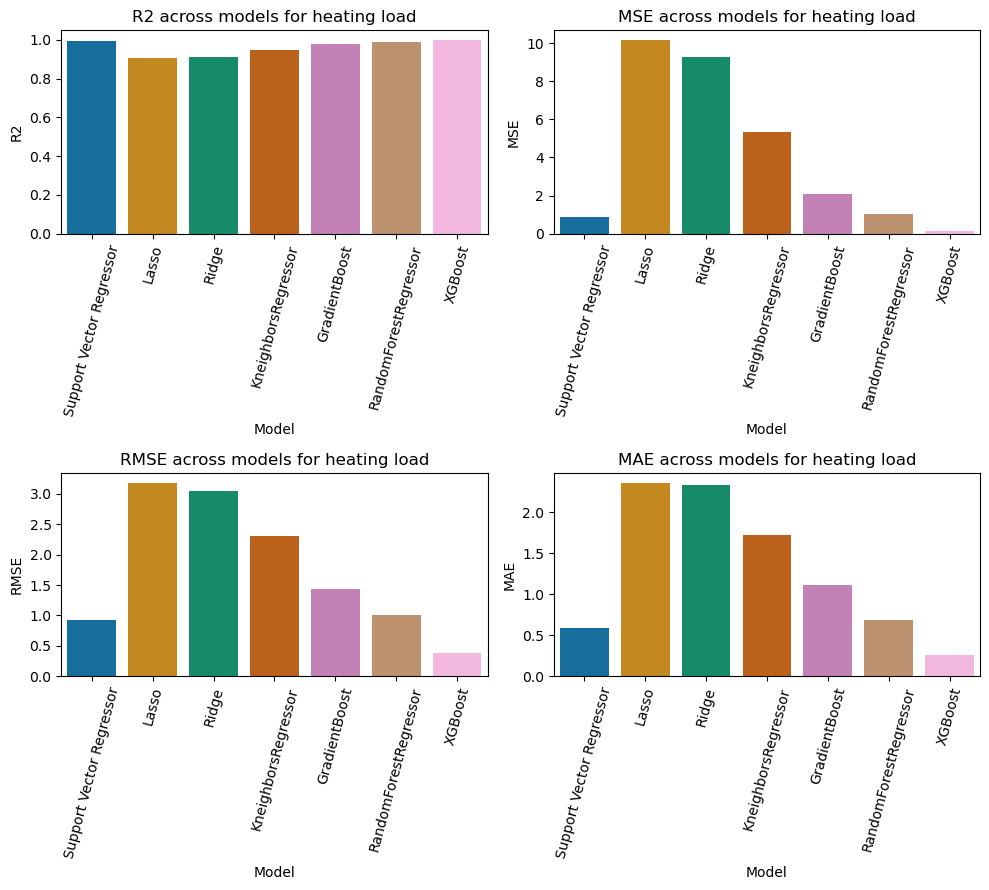

In [79]:
#plotting a graph of models against metrics for heating load prediction
fig, axes=plt.subplots(2,2,figsize=(10,9))
sns.barplot(x='Model', y='R2', data=heating_df,ax=axes[0,0], palette='colorblind')
sns.barplot(x='Model', y='MSE', data=heating_df,ax=axes[0,1], palette='colorblind')
sns.barplot(x='Model', y='RMSE', data=heating_df,ax=axes[1,0], palette='colorblind')
sns.barplot(x='Model', y='MAE', data=heating_df,ax=axes[1,1], palette='colorblind')
axes[0,0].set_title('R2 across models for heating load')
axes[0,1].set_title('MSE across models for heating load')
axes[1,0].set_title('RMSE across models for heating load')
axes[1,1].set_title('MAE across models for heating load')
axes[0,0].set_ylabel('R2')
axes[0,1].set_ylabel('MSE')
axes[1,0].set_ylabel('RMSE')
axes[1,1].set_ylabel('MAE')
axes[0,0].set_xticklabels(
    axes[0,0].get_xticklabels(),
    rotation=75)
axes[0,1].set_xticklabels(
    axes[0,1].get_xticklabels(),
    rotation=75)
axes[1,0].set_xticklabels(
    axes[1,0].get_xticklabels(),
    rotation=75)
axes[1,1].set_xticklabels(
    axes[1,1].get_xticklabels(),
    rotation=75)



plt.tight_layout()
plt.show()



[Back to Table of Contents](#Table-of-Contents)

#### Comparing models for cooling load predictions

In [99]:
from sklearn.metrics import mean_squared_error

# List of regressors
regressors = [
    ['Support Vector Regressor', svr2],
    ['Lasso', lasso2],
    ['Ridge', ridge2],
    ['KneighborsRegressor', knr2],
    ['GradientBoost', gbr2],
    ['RandomForestRegressor',rf_reg2], ['XGBoost',xgb_reg2]
]



# Training and evaluating each model
cooling_df= pd.DataFrame(columns=['Model','R2', 'MSE','RMSE','MAE'])

for name, model in regressors:

    # Making predictions

    y2_pred = model.predict(X_test)

    # Calculating Seleted Metrics; r2,rmse,mse,mae
    r2= model.score(X_test, y2_test).round(3)
    mse = MSE(y2_test, y2_pred)
    rmse = mse ** 0.5
    mae= MAE(y2_test, y2_pred)
    cooling_df.loc[len(cooling_df)] = [name,r2, mse, rmse,mae]

cooling_df







,Model,R2,MSE,RMSE,MAE
0,Support Vector Regressor,0.982,1.726759,1.314062,0.750999
1,Lasso,0.877,11.442153,3.382625,2.489171
2,Ridge,0.890,10.237558,3.199618,2.278745
3,KneighborsRegressor,0.954,4.287401,2.070604,1.596076
4,GradientBoost,0.956,4.081108,2.020175,1.386318
5,RandomForestRegressor,0.884,10.798953,3.286176,2.721180
6,XGBoost,0.988,1.142750,1.068995,0.560478


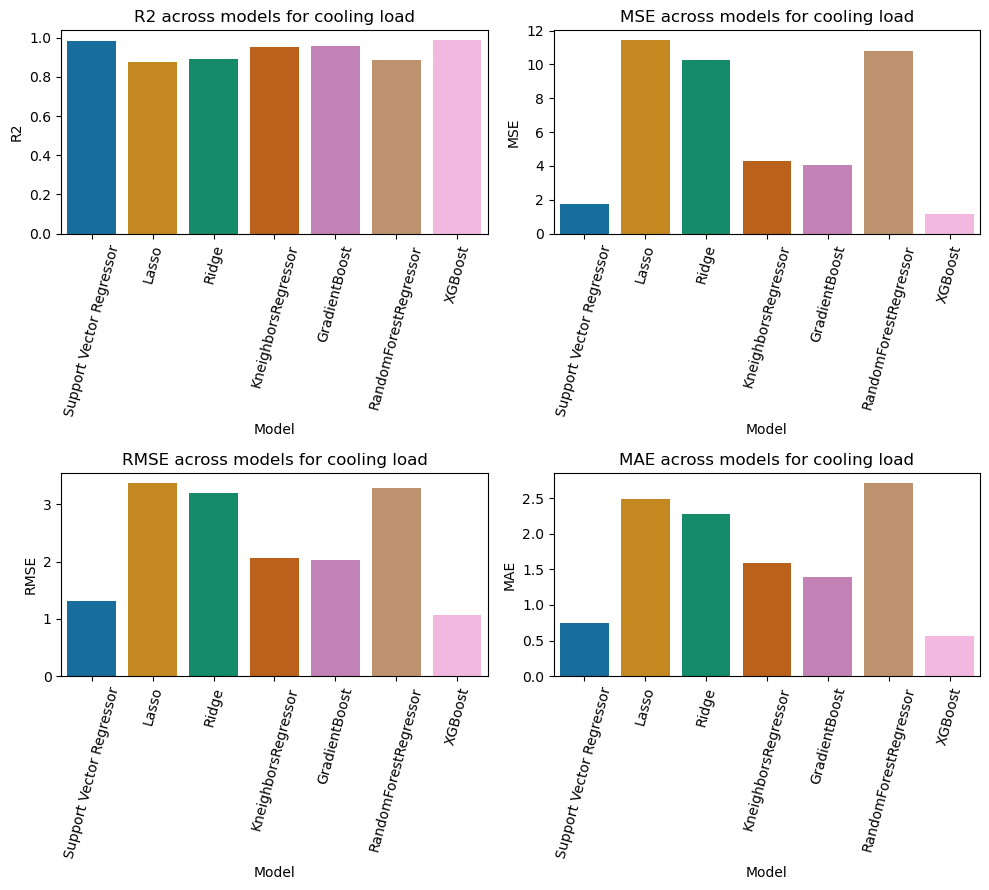

In [103]:
#plotting a graph of models against metrics for cooling load prediction
fig, axes=plt.subplots(2,2,figsize=(10,9))
sns.barplot(x='Model', y='R2', data=cooling_df,ax=axes[0,0], palette='colorblind')
sns.barplot(x='Model', y='MSE', data=cooling_df,ax=axes[0,1], palette='colorblind')
sns.barplot(x='Model', y='RMSE', data=cooling_df,ax=axes[1,0], palette='colorblind')
sns.barplot(x='Model', y='MAE', data=cooling_df,ax=axes[1,1], palette='colorblind')
axes[0,0].set_title('R2 across models for cooling load')
axes[0,1].set_title('MSE across models for cooling load')
axes[1,0].set_title('RMSE across models for cooling load')
axes[1,1].set_title('MAE across models for cooling load')
axes[0,0].set_ylabel('R2')
axes[0,1].set_ylabel('MSE')
axes[1,0].set_ylabel('RMSE')
axes[1,1].set_ylabel('MAE')
axes[0,0].set_xticklabels(
    axes[0,0].get_xticklabels(),
    rotation=75)
axes[0,1].set_xticklabels(
    axes[0,1].get_xticklabels(),
    rotation=75)
axes[1,0].set_xticklabels(
    axes[1,0].get_xticklabels(),
    rotation=75)
axes[1,1].set_xticklabels(
    axes[1,1].get_xticklabels(),
    rotation=75)
plt.tight_layout()
plt.show()

#### Comparing metrics for both heating and cooling loads

In [118]:
merged= pd.merge(heating_df, cooling_df, on='Model', suffixes=['_heating','_cooling'])
merged.sort_values(by='R2_heating', ascending=False).reset_index(drop='True')

,Model,R2_heating,MSE_heating,RMSE_heating,MAE_heating,R2_cooling,MSE_cooling,RMSE_cooling,MAE_cooling
0,XGBoost,0.999,0.150158,0.387503,0.253880,0.988,1.142750,1.068995,0.560478
1,Support Vector Regressor,0.992,0.847499,0.920597,0.582948,0.982,1.726759,1.314062,0.750999
2,RandomForestRegressor,0.990,1.004779,1.002387,0.680950,0.884,10.798953,3.286176,2.721180
3,GradientBoost,0.980,2.067503,1.437881,1.108170,0.956,4.081108,2.020175,1.386318
4,KneighborsRegressor,0.949,5.324935,2.307582,1.720208,0.954,4.287401,2.070604,1.596076
5,Ridge,0.912,9.285645,3.047236,2.333491,0.890,10.237558,3.199618,2.278745
6,Lasso,0.903,10.167798,3.188698,2.360106,0.877,11.442153,3.382625,2.489171


### Model Selection

eXtreme Gradient Boosting Regressor(XGBoostRegressor) is the best-performing model, followed by the Support Vector Regressor model, when taking into account the R2, Mean Squared Error (MSE), Root Mean Squared Error() and Mean Absolute Error (MAE) of the various models.

### Conclusion

The goal of this project was to create a prediction model for Cooling Load and Heating Load using building design features from a Building Energy Efficiency dataset.

Data cleaning and validation as well as Exploratory Data Analysis was performed on the dataset to ensure effective model building.

The data set was split into one train set and two test sets for predictive model building.

The XGBoostRegressor, with an R2 score of 0.9877 and 0.9985 for Cooling Load and Heating Load respectively, was found to be the best-performing regression model after a variety of models, including Support Vector Regressor, Random Forest and Random Forest Regressor.

Other metrics such as the Root Mean Squared error and Mean Squared error were also employed to measure model performance.

[Back to Table of Contents](#Table-of-Contents)